In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from numba import jit, njit, prange
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
from scipy.optimize import minimize

In [2]:
DIR = Sim_res / 'Geo_Rand_Walk_2D' / 'v2_p_atmos'
if DIR.exists():
    print(*list(DIR.glob('*.txt')), sep='\n')

C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_100.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_1000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_10000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_150.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_200.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_3000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_350.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_500.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Dr

In [3]:
files = list(DIR.glob('*0.txt'))
df = np.array([np.loadtxt(files[0], skiprows=1)])
for f in files[1:]:
    df_0 = np.loadtxt(f, skiprows=1)
    df = np.append(df, [df_0], axis=0)
df = df[np.argsort(df[:,0])]

f = open(files[1], 'r')
for line in f:
    s = line.split()
    break
    
data = pd.DataFrame(df, columns=s)
data['N'] = data['N'].apply(lambda x: int(x))
data['steps'] = data['steps'].apply(lambda x: int(x)) 
data

,N,n1_mean,n2_mean,n3_mean,n4_mean,uni_mean,n1_std,n2_std,n3_std,n4_std,uni_std,p0,p1,p2,p3,steps
0,100,0.067676,0.335163,0.357310,0.239851,0.490868,0.033153,0.087256,0.066923,0.092094,0.082473,0.182831,0.246855,0.290593,0.279720,96430000
1,150,0.057825,0.307874,0.356280,0.278021,0.462622,0.026299,0.076904,0.059072,0.091072,0.074609,0.212044,0.250342,0.277737,0.259877,69360000
2,200,0.052236,0.290436,0.353706,0.303622,0.444360,0.022429,0.070394,0.054511,0.089504,0.069589,0.231971,0.251413,0.269204,0.247413,36140000
3,350,0.043761,0.260708,0.345895,0.349636,0.412508,0.016684,0.059558,0.047437,0.085118,0.061001,0.268341,0.251656,0.253724,0.226279,17070000
4,500,0.039590,0.244237,0.339654,0.376519,0.394394,0.013959,0.053668,0.043809,0.081699,0.056254,0.290471,0.250914,0.244515,0.214100,7720000
5,750,0.035672,0.227586,0.331875,0.404867,0.375589,0.011506,0.047830,0.040327,0.077527,0.051436,0.313906,0.249196,0.234730,0.202167,4810000
6,1000,0.033333,0.216963,0.326096,0.423608,0.363247,0.010109,0.044158,0.038185,0.074502,0.048411,0.329962,0.247547,0.228218,0.194273,2480000
7,3000,0.026597,0.183363,0.303506,0.486534,0.322651,0.006449,0.032976,0.031578,0.062995,0.038761,0.385626,0.239993,0.205155,0.169226,420000
8,5000,0.024335,0.170867,0.293222,0.511576,0.306788,0.005359,0.029017,0.029140,0.057992,0.035158,0.409736,0.235407,0.195493,0.159364,140000
9,6500,0.023299,0.165178,0.288158,0.523364,0.299215,0.004906,0.027240,0.028027,0.055635,0.033523,0.420400,0.232740,0.191620,0.155240,100000


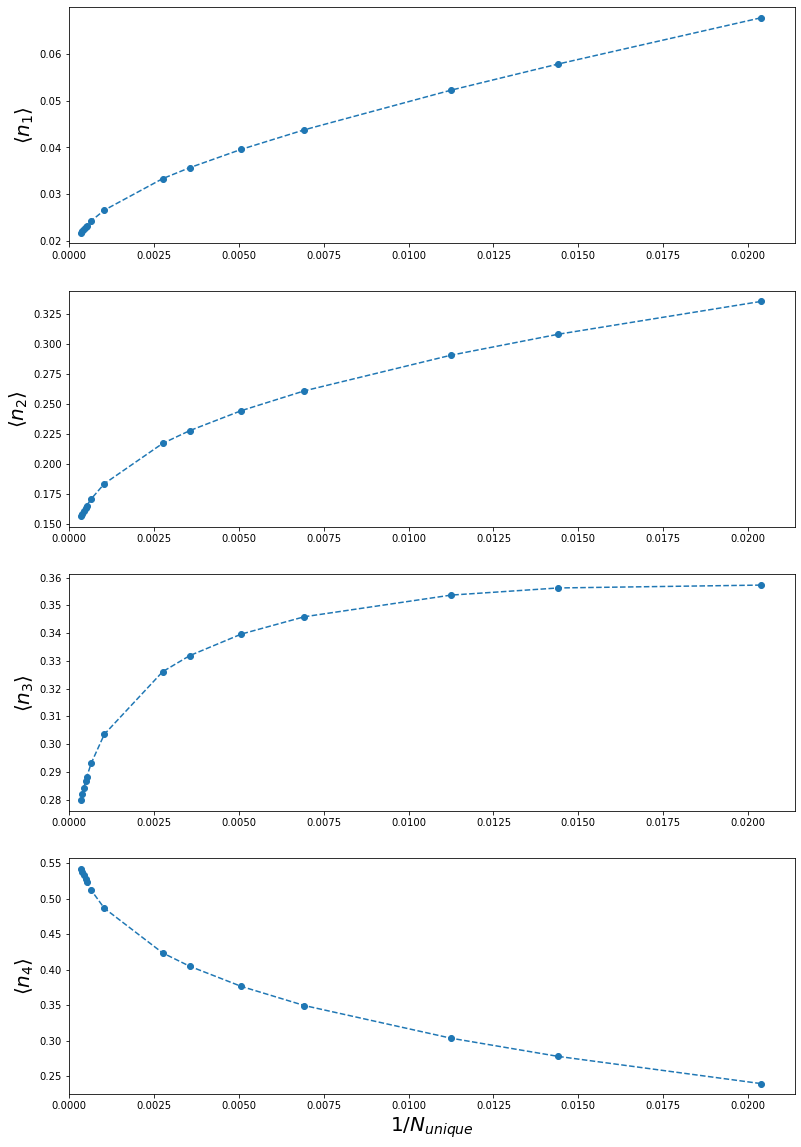

In [4]:
fig, ax = plt.subplots(4,1, figsize=(13,20))
data['1/N'] = 1/(data['N'] * data['uni_mean'])
x = data['1/N'] 
y_names = ['n1_mean','n2_mean','n3_mean','n4_mean']
dy_names = ['n1_std','n2_std','n3_std','n4_std']
for i in range(4):
    y = data[y_names[i]]
    dy = data[dy_names[i]] / np.sqrt(data['steps'])
    ax[i].errorbar(x, y, dy, fmt='o--')
    if i < 4:
        ax[i].set_ylabel(fr'$\langle n_{i+1} \rangle$', fontsize=20)
    else:
        ax[i].set_ylabel(r'$\langle n_{unique} \rangle$', fontsize=20)
    ax[i].set_xlim(0.)
ax[-1].set_xlabel(r'$1/N_{unique}$', fontsize=20);

#plt.savefig(Path.cwd() / 'Images' / 'Rand_Path_N1-4_unique.png')

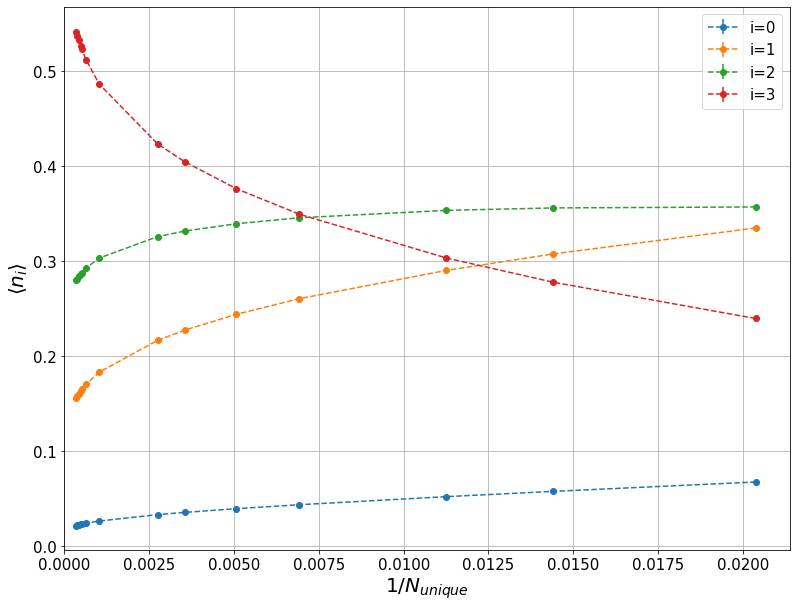

In [5]:
plt.figure(figsize=(13,10))
x = data['1/N'] 
y_names = ['n1_mean','n2_mean','n3_mean','n4_mean']
dy_names = ['n1_std','n2_std','n3_std','n4_std']
for i in range(4):
    y = data[y_names[i]]
    dy = data[dy_names[i]] / np.sqrt(data['steps'])
    plt.errorbar(x, y, dy, fmt='o--', label=f'i={i}')
    plt.ylabel(r'$\langle n_{i} \rangle$', fontsize=20)
    plt.xlim(0.)
plt.xlabel(r'$1/N_{unique}$', fontsize=20);
plt.grid()
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)

#plt.savefig(Path.cwd() / 'Images' / 'Rand_Path_n_i_unique.png')

# Проверка характера шкалирования

In [5]:
def full_scaling(x, y, dy, n, image_name=None):
    fig, axes = plt.subplots(3, 1, figsize=(13,17), constrained_layout=True)
    fig.suptitle(fr"$n_{n}$ scaling", fontsize=30)
    x_reg = x.copy()
    y_reg = y.copy()
    for i, scaling, ax in zip([0,1,2], [('linear', 'linear'), ('log', 'linear'), ('log', 'log')], axes):
        ax.errorbar(x, y, yerr=dy, fmt="s--", label=fr"MC Data of n={n}")
        ax.set_xscale(scaling[1])
        ax.set_yscale(scaling[0])
        if scaling[0] == 'linear' and scaling[1] == 'linear':
            title = 'linear scaling'
        elif scaling[0] == 'log' and scaling[1] == 'linear':
            title = 'log-linear scaling'
        else:
            title = 'log-log scaling'
        ax.set_title(title, fontsize=20)
        ax.tick_params(labelsize=16, which='both')
        ax.legend()
    axes[-1].set_xlabel('1/N', fontsize=20)
    if image_name != None:
        plt.savefig(Path.cwd() / "Images" / (image_name + ".png"))
    plt.show()

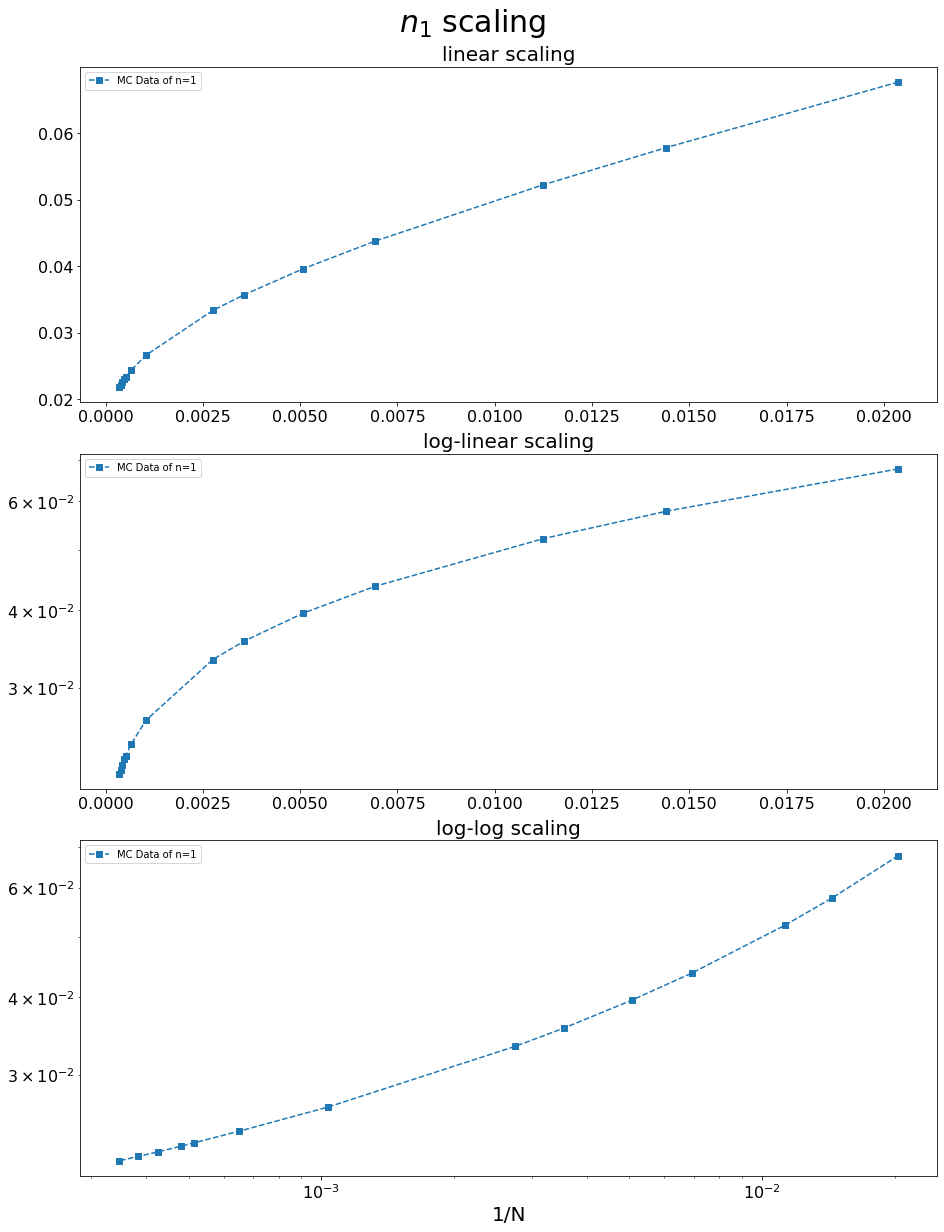

In [21]:
x = data['1/N']
y = data['n1_mean']
dy = data['n1_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 1)

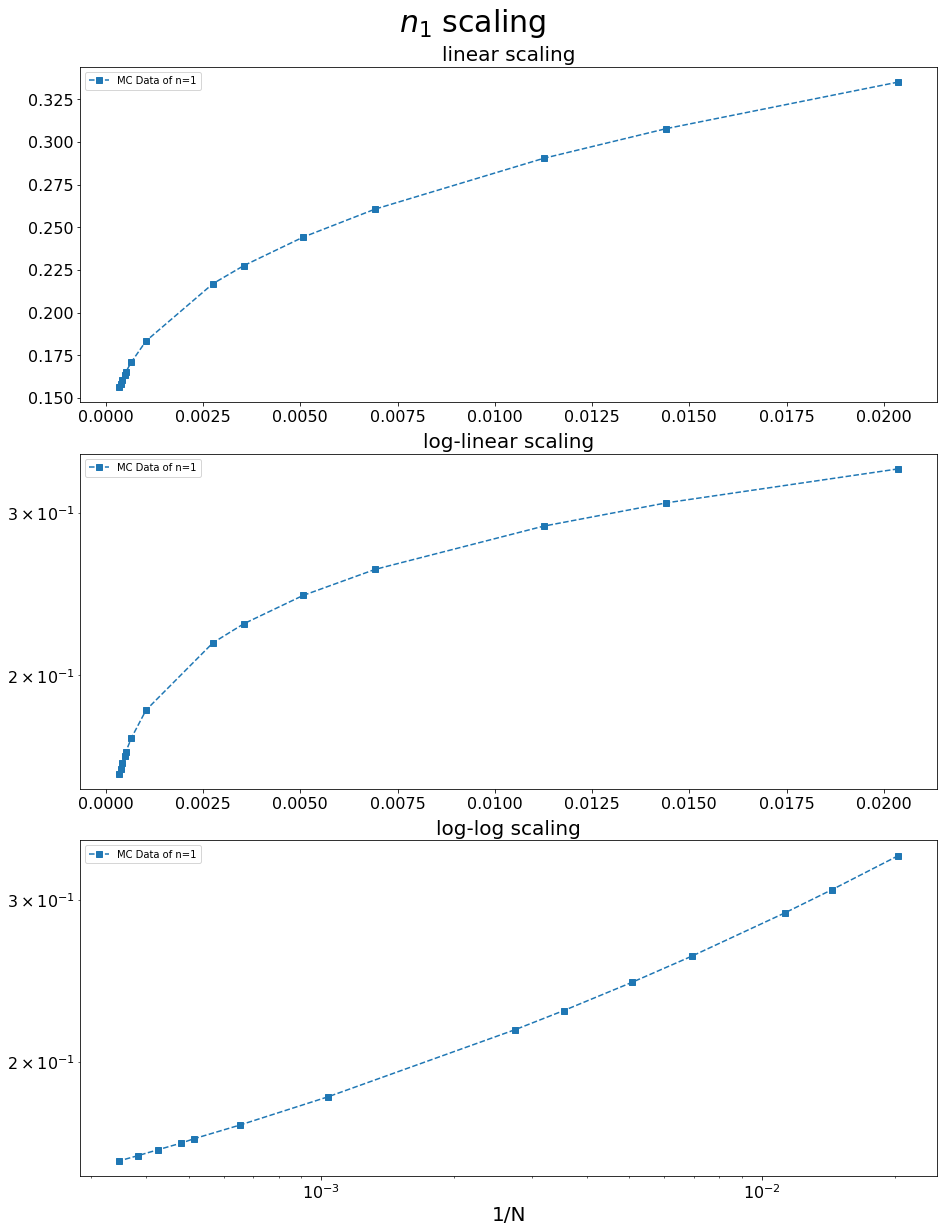

In [22]:
x = data['1/N']
y = data['n2_mean']
dy = data['n2_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 1)

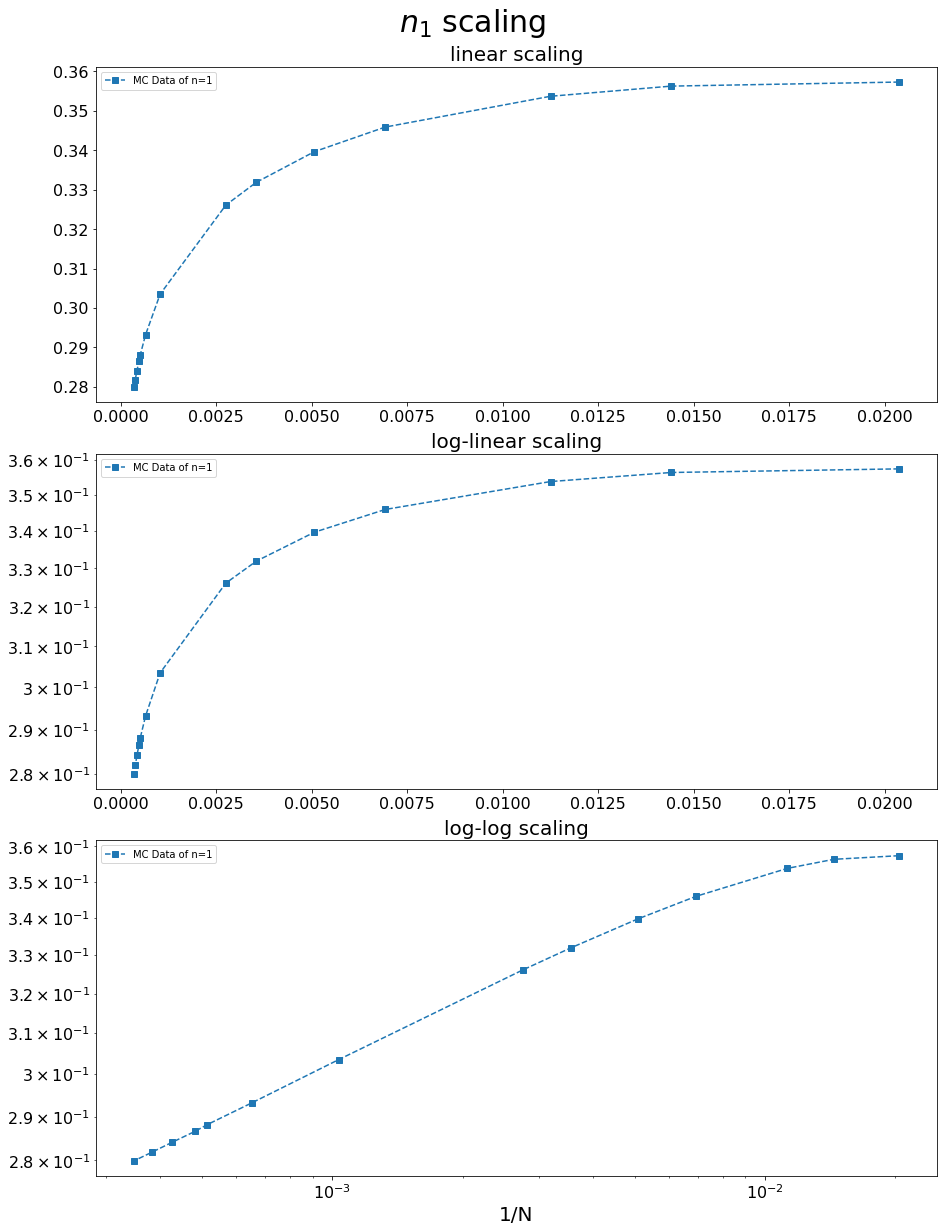

In [23]:
x = data['1/N']
y = data['n3_mean']
dy = data['n3_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 1)

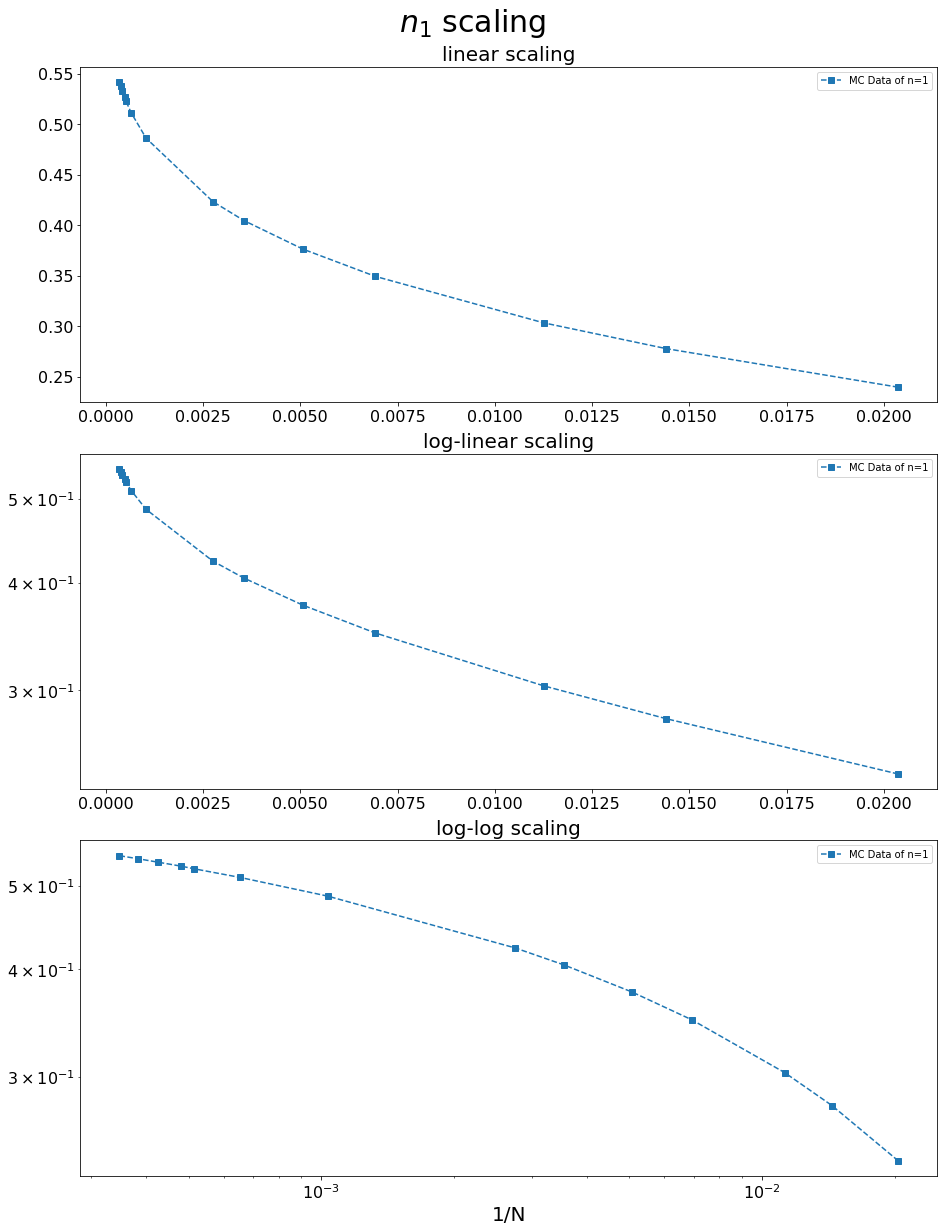

In [24]:
x = data['1/N']
y = data['n4_mean']
dy = data['n4_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 1)

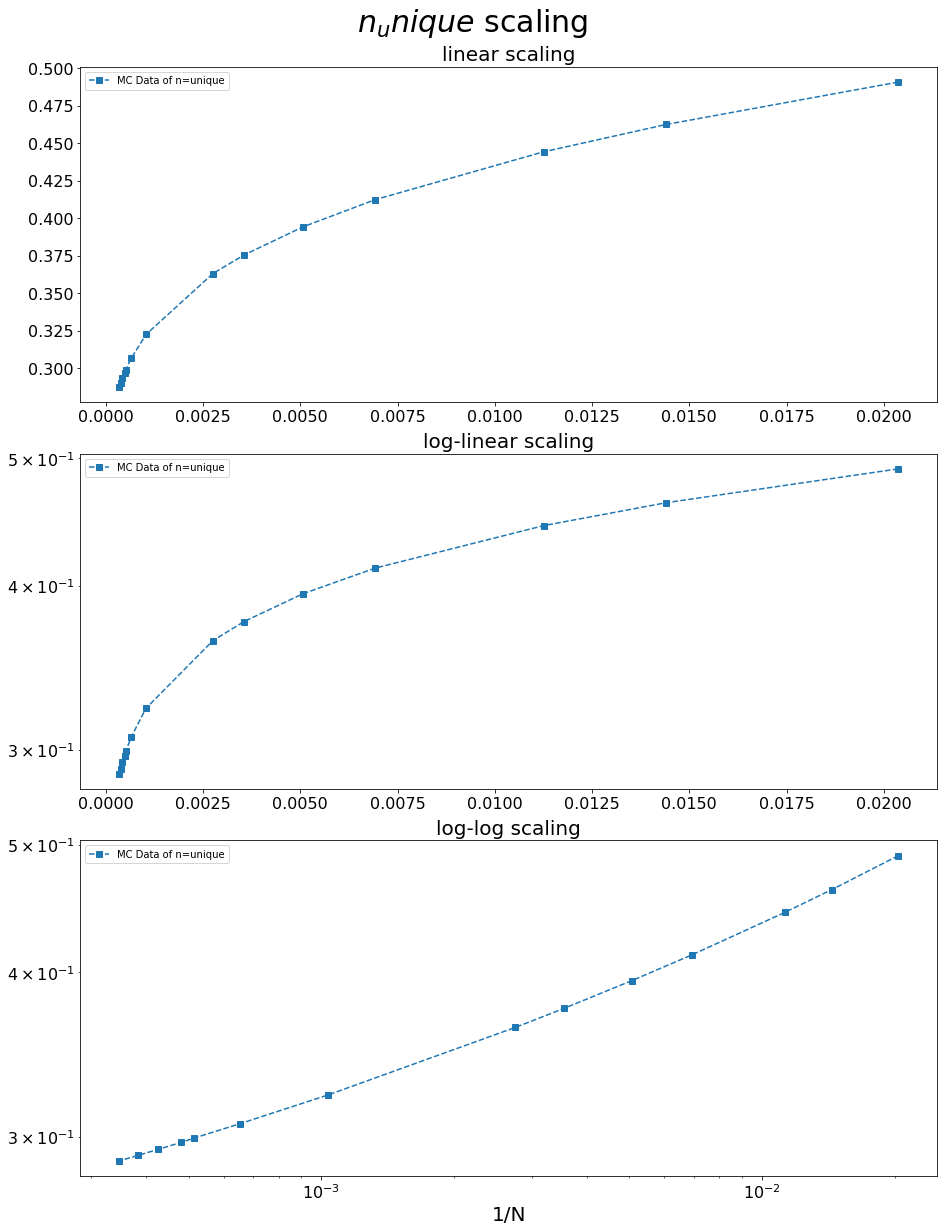

In [25]:
x = data['1/N']
y = data['uni_mean']
dy = data['uni_std'] / np.sqrt(data['steps'])
full_scaling(x, y, None, 'unique')

# Оценка по лог-лог-шкалированию

In [6]:
def f_x_a(x, a):
    return a[0] * x ** a[1] + a[2]

def leastsquares(a, x, y):
    s = 0
    for i in range(len(x)):
        s += (f_x_a(x[i], a) - y[i]) ** 2
    return s

def errFit(hess_inv, resVariance):
    return np.sqrt( np.diag( hess_inv * resVariance))

def log_log_scaling(x, y, dy, a_0=[1,1,0], text_pos=(0.0001,0.07), out_ax=None, image_name=None):
    if out_ax == None:
        fig, ax = plt.subplots(figsize=(15,9))
    else:
        ax = out_ax
    ax.errorbar(x,y,dy, fmt='s--')
    
    res = minimize(leastsquares, a_0, (x,y))
    a = res.x
    da = errFit( res.hess_inv,  res.fun)
    
    ax.plot(x, a[0] * x ** a[1] + a[2])
    ax.set_xscale('log')
    ax.set_yscale('log')
    print(res.success)
    s1 = 'y = k * (1/N)^a + b' + "\n"
    s2 = r'k = %.4f $\pm$ %.4f' % (a[0], da[0]) + '\n'
    s3 = r'a = %.4f $\pm$ %.4f' % (a[1], da[1]) + '\n'
    s4 = r'b = %.4f $\pm$ %.4f' % (a[2], da[2])
    ax.text(*text_pos, s1 + s2 + s3 + s4, fontsize=17, bbox=dict(facecolor='brown', alpha=0.3))
    
    if image_name != None:
        plt.savefig(Path.cwd() / "Images" / (image_name + ".png"))
    return np.append(a, da)

In [7]:
res = pd.DataFrame(columns=['k','a','b','d_k','d_a','d_b', 'N_min', 'N_max'], index=['n1','n2','n3','n4'])
res

,k,a,b,d_k,d_a,d_b,N_min,N_max
n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3000 10000
True


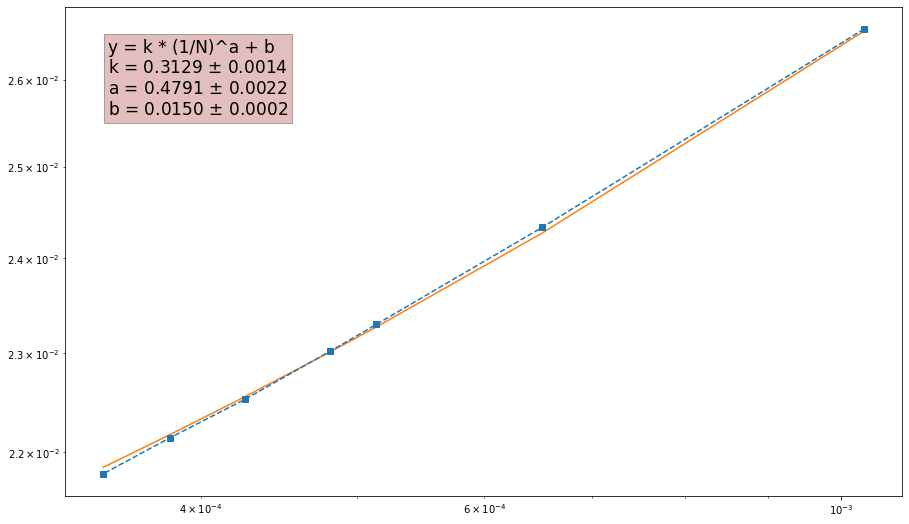

In [8]:
k=7
x = np.array(data['1/N'][k:])
y = np.array(data['n1_mean'][k:])
dy = np.array(data['n1_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [0.3, 0.5, 0.01], text_pos=(0.00035, y.max()-0.001), image_name=None)
res0 = np.append(res0, [int(data['N'][k]*data['uni_mean'][k]), int(data['N'][13]*data['uni_mean'][13])])
res.loc['n1'] = res0

3000 10000
True


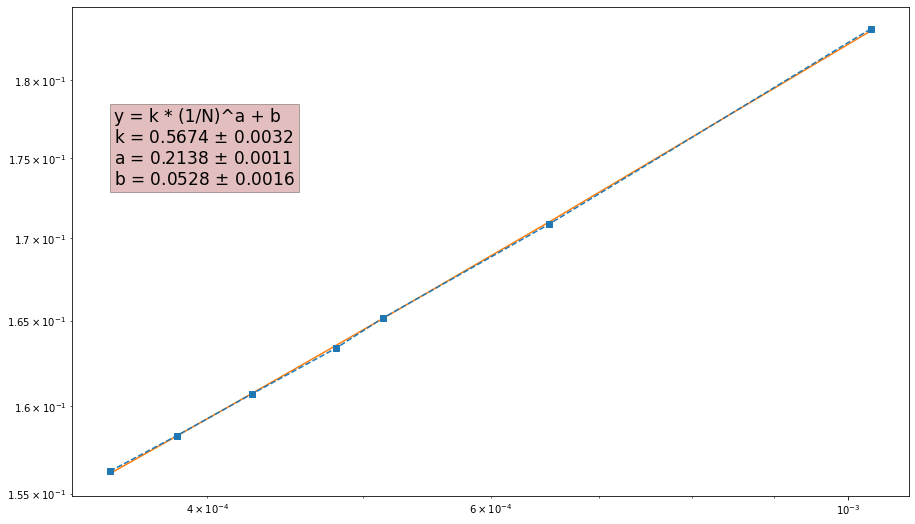

In [9]:
k=7
x = np.array(data['1/N'][k:])
y = np.array(data['n2_mean'][k:])
dy = np.array(data['n2_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [0.3, 0.5, 0.01], text_pos=(0.00035, y.max()-0.01), image_name=None)
res0 = np.append(res0, [int(data['N'][k]*data['uni_mean'][k]), int(data['N'][13]*data['uni_mean'][13])])
res.loc['n2'] = res0

3000 10000
True


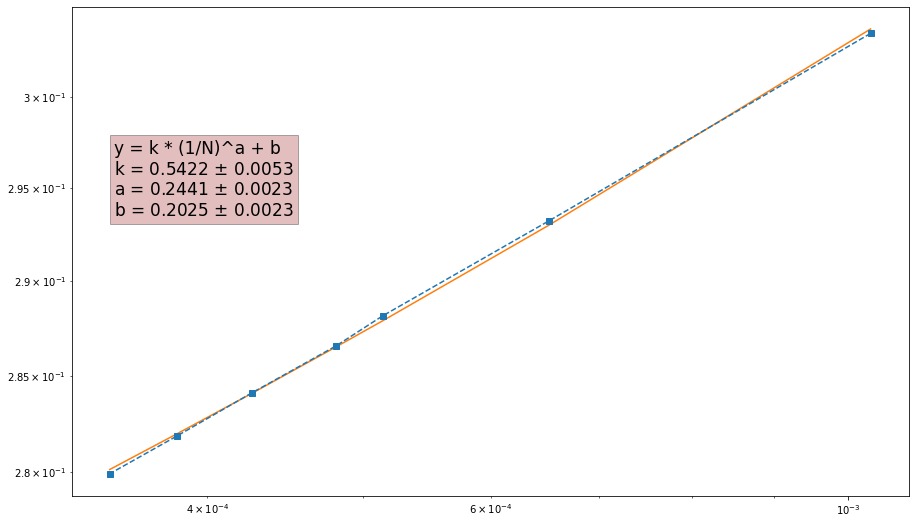

In [10]:
k=7
x = np.array(data['1/N'][k:])
y = np.array(data['n3_mean'][k:])
dy = np.array(data['n3_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [0.6, 0.2, 0.1], text_pos=(0.00035, y.max()-0.01), image_name=None)
res0 = np.append(res0,[int(data['N'][k]*data['uni_mean'][k]), int(data['N'][13]*data['uni_mean'][13])])
res.loc['n3'] = res0

500 10000
True


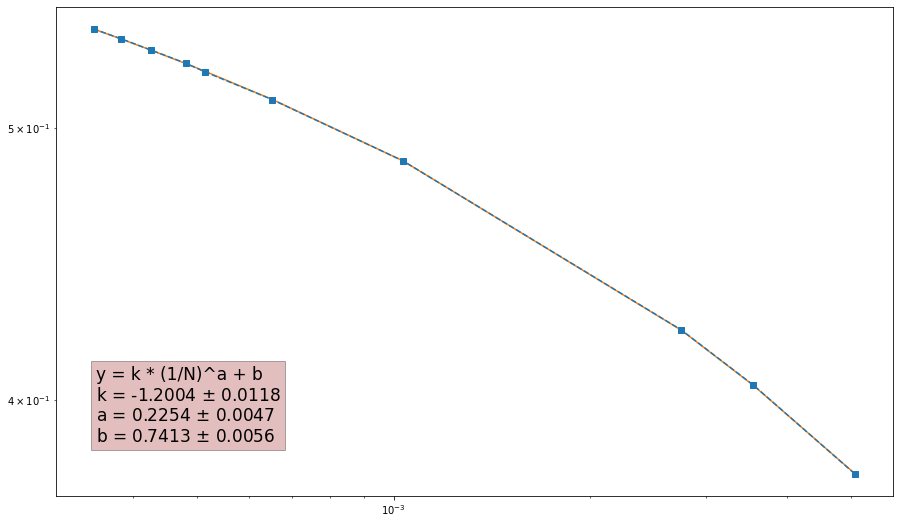

In [11]:
k=4
x = np.array(data['1/N'][k:])
y = np.array(data['n4_mean'][k:])
dy = np.array(data['n4_std'] / data['steps'])[k:]
print(data['N'][k], data['N'][13])
res0 = log_log_scaling(x, y, dy, a_0 = [-0.5, 0.5, 0.55], text_pos=(0.00035, y.min()+0.01), image_name=None)
res0 = np.append(res0,[int(data['N'][k]*data['uni_mean'][k]), int(data['N'][13]*data['uni_mean'][13])])
res.loc['n4'] = res0

In [12]:
res

,k,a,b,d_k,d_a,d_b,N_min,N_max
n1,0.312899,0.479118,0.014961,0.001383,0.002225,0.00017,967.0,2875.0
n2,0.567402,0.213836,0.052791,0.003168,0.001114,0.001556,967.0,2875.0
n3,0.542193,0.244072,0.202502,0.005275,0.002297,0.002336,967.0,2875.0
n4,-1.20037,0.225437,0.741332,0.011843,0.004707,0.005629,197.0,2875.0


In [14]:
print(res.style.to_latex(position_float='centering'))

\begin{table}
\centering
\begin{tabular}{lllllllll}
 & k & a & b & d_k & d_a & d_b & N_min & N_max \\
n1 & 0.312899 & 0.479118 & 0.014961 & 0.001383 & 0.002225 & 0.000170 & 967.000000 & 2875.000000 \\
n2 & 0.567402 & 0.213836 & 0.052791 & 0.003168 & 0.001114 & 0.001556 & 967.000000 & 2875.000000 \\
n3 & 0.542193 & 0.244072 & 0.202502 & 0.005275 & 0.002297 & 0.002336 & 967.000000 & 2875.000000 \\
n4 & -1.200370 & 0.225437 & 0.741332 & 0.011843 & 0.004707 & 0.005629 & 197.000000 & 2875.000000 \\
n_unique & 0.813935 & 0.247506 & 0.174182 & 0.001038 & 0.000232 & 0.000393 & 197.000000 & 2875.000000 \\
\end{tabular}
\end{table}



In [13]:
res.to_csv('rw_bulk_Nunique.csv')